
<h1 id="Lab-exercises-3">Lab exercises 3<a class="anchor-link" href="#Lab-exercises-3">¶</a></h1><p>For this lab exercises, please submit 2 notebooks / python script and 2 reports, one for each part. The deadline is 22 december.</p>
<p>It is important the you <strong>read the documentation</strong> to understand how to use Pytorch functions, what kind of transformation they apply etc. You have to <strong>take time to read it carefully</strong> to understand what you are doing.</p>
<ul>
<li><a href="https://pytorch.org/docs/stable/nn.html">https://pytorch.org/docs/stable/nn.html</a></li>
<li><a href="https://pytorch.org/docs/stable/torch.html">https://pytorch.org/docs/stable/torch.html</a></li>
</ul>
<h2 id="1.-Part-one:-MNIST-classification-with-Pytorch">1. Part one: MNIST classification with Pytorch<a class="anchor-link" href="#1.-Part-one:-MNIST-classification-with-Pytorch">¶</a></h2><p>The goal of the first part is to learn how to use Pytorch and to observe the impact of regularization during training. You should test different network architectures, e.g. with hidden layers of size 128-128, 128-64-32-16, 256-128-64-32-16, 512-256-128-64-32-16, 800-800, and different activation functions (tanh, relu, sigmoid).</p>
<p>Remember that Pytorch expects data in a different format than in the previous lab exercise: the first dimension is always the batch dimension.</p>


In [16]:
# import libs that we will use
import os
import numpy as np
import matplotlib.pyplot as plt
import math

# To load the data we will use the script of Gaetan Marceau Caron
# You can download it from the course webiste and move it to the same directory that contains this ipynb file
import dataset_loader

%matplotlib inline

## DATA

In [19]:
# Download mnist dataset 
if("mnist.pkl.gz" not in os.listdir(".")):
    !wget http://deeplearning.net/data/mnist/mnist.pkl.gz

# if you have it somewhere else, you can comment the lines above
# and overwrite the path below
mnist_path = "./mnist.pkl.gz"

In [20]:
# load the 3 splits
train_data, dev_data, test_data = dataset_loader.load_mnist(mnist_path)

label: 8


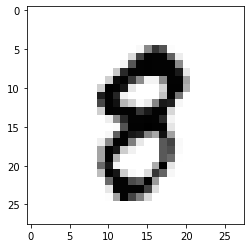

In [22]:
index = 900
label = train_data[1][index]
picture = train_data[0][index]

print("label: %i" % label)
plt.imshow(picture.reshape(28,28), cmap='Greys')

In [13]:
first= 800

image = torch.from_numpy(train_data[0][first])
print(image.shape) # flat image of dim (784,)
# reshape the tensor so it is represented as a batch containing a single image
# -1 means "all remaining elements", here it would be equivalent to image.reshape(1, 784)
image = image.reshape(1, -1)
print(image.shape) # flat image of dim (1, 784)

torch.Size([784])
torch.Size([1, 784])


In [14]:
# Constructing a batched input
batch_size = 10
first = 20

# the cat() function concatenates a list of tensor along a dimension
batch_input = torch.cat(
    [
        # we reshape the image tensor so it has dimension (1, 784)
        torch.from_numpy(image).reshape(1, -1)
        for image in train_data[0][first:first + batch_size]
    ],
    # we want to concatenate on the batch dimension
    dim=0
)
print(batch_input.shape)  # batch of ten flat images (10, 784)



torch.Size([10, 784])



<h3 id="1.2.-Layer-initialization">1.2. Layer initialization<a class="anchor-link" href="#1.2.-Layer-initialization">¶</a></h3><p>By default, Pytorch will apply Kaiming initialization to linear layers. However, I recommend you to always explicitly initialize you network by hand in the constructor.</p>


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)
        # initialization are always in-place operations
        # linear.weight is a Parameter, linear.weight.data is the tensor containing the parameter values
        torch.nn.init.xavier_uniform_(linear.weight.data)  # Xavier/Glorot init for tanh
        torch.nn.init.kaiming_uniform_(linear.weight.data)  # Kaiming/He init for tanh

    if bias:
        torch.nn.init.zeros_(linear.bias.data)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))

class CBOW_classifier(nn.Module):
    def __init__(self):
        super(CBOW_classifier, self).__init__()
        # output first layer
        self.output = th.nn.Linear(embedding_dim,1)
        #init weights and bias
        th.nn.init.xavier_uniform_(self.output.weight.data)
        th.nn.init.zeros_(self.output.bias.data)
        
        
    def forward(self, inputs):
        zi = self.emb_table(inputs) #embedding all words for each sequence
        z = th.sum(zi ,dim=0) #sum embedding vectors for each sequence     
        output = th.sigmoid(self.output(z))
        
        return(output)

In [15]:
def training(epochs,stepsize,txt_train,label_train,txt_dev,label_dev):

    model = CBOW_classifier(vocab_size=len(dic)+1,embedding_dim=4)   
    optimizer = th.optim.SGD(params=model.parameters(), lr =stepsize, weight_decay=1e-4)
    
    linear = torch.nn.Linear(10, 20, bias=bias)

    


NameError: name 'bias' is not defined


<h3 id="1.3.-Regularization">1.3. Regularization<a class="anchor-link" href="#1.3.-Regularization">¶</a></h3><p>You can try two types of regularization (they can be combined together):</p>
<ul>
<li>weight decay: it is a parameter of the optimizer</li>
<li>dropout: see slides</li>
</ul>
<h3 id="1.4.-Gradient-clipping">1.4. Gradient clipping<a class="anchor-link" href="#1.4.-Gradient-clipping">¶</a></h3><p>A commong trick for training neural networks is gradient clipping: if the norm of the gradient is too big, we rescale the gradient. This trick can be used to prevent exploding gradients and also to make "too big steps" in the wrong direction due the use of approximate gradient computation in SGD.</p>


In [ ]:

batch_loss.backward()  # compute gradient
torch.nn.utils.clip_grad_value_(network.parameters(), 5.)  # clip gradient if its norm exceed 5
optimizer.step()  # update parameters




<h3 id="1.4.-Bonus: Convolutional-Neural-Network">1.4. Bonus: Convolutional Neural Network<a class="anchor-link" href="#1.4.-Bonus: Convolutional-Neural-Network">¶</a></h3><p>You can try to rely on a CNN instead of a MLP to classify MNIST images (you can still have a single layer MLP on top of convolutions, after pooling!). Note that this will requires you to reshape the input images!</p>
<p><a href="https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d">https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d</a></p>


In [ ]:

t = torch.rand((10, 100))  # t is batch of 10 "flat" pictures
t = t.reshape(10, 10, 10)  # we reshape t so each batch contains a 10x10 picture that is not flat




<h2 id="Part-2:-Variational-Auto-Encoder">Part 2: Variational Auto-Encoder<a class="anchor-link" href="#Part-2:-Variational-Auto-Encoder">¶</a></h2><p>To build a new Variational Auto-Encoder, you need two networks:</p>
<ul>
<li>An encoder that will take as input an image and compute the parameters of list of Normal distributions</li>
<li>A decoder that will take a sample from each Normal distribution and will output an image</li>
</ul>
<p>For simplicity we will assume that:</p>
<ul>
<li>each network as a single hidden layer of size 100</li>
<li>the latent space contains only 2 points</li>
</ul>
<p>To understand exactly what a VAE is, you can:</p>
<ul>
<li>check the slides of Michèle Sebag</li>
<li>check this tutorial: <a href="https://arxiv.org/abs/1606.05908">https://arxiv.org/abs/1606.05908</a></li>
</ul>
<h3 id="1.2.-Encoder">1.2. Encoder<a class="anchor-link" href="#1.2.-Encoder">¶</a></h3><ul>
<li>Compute an hidden representation: $z = relu(W^1 x + b^1)$</li>
<li>Compute the means of the normal distributions: $mu = W^2 x + b^2$</li>
<li>Compute the log variance of the normal distributions: $log\_sigma\_squared = W^3 x + b^3$</li>
</ul>
<h2 id="1.2.-Decoder">1.2. Decoder<a class="anchor-link" href="#1.2.-Decoder">¶</a></h2><p>This a simple MLP, nothing new here!</p>
<h2 id="1.3.-Training-loss">1.3. Training loss<a class="anchor-link" href="#1.3.-Training-loss">¶</a></h2><p>To compute the training loss, you must compute two terms:</p>
<ul>
<li>a Monte-Carlo estimation of the reconstruction loss</li>
<li>the KL divergence between the distributions computed by the encoder and the prior</li>
</ul>
<p>To sample values, you can use the reparameterization trick as follows:</p>


In [ ]:

e = torch.normal(0, 1., mu.shape)
z = mu + e * torch.sqrt(torch.exp(log_sigma_squared))




<p>For the reconstruction loss, use the Binary Cross Entropy loss:</p>


In [ ]:

loss_builder = torch.nn.BCEWithLogitsLoss(reduction="sum")




<p>The formula of the KL divergence with the prior is as follows:</p>


In [ ]:

-0.5 * torch.sum(1 + log_sigma_squared - mu.pow(2) - log_sigma_squared.exp())




<h2 id="1.4.-Recomended-hyper-parameters">1.4. Recomended hyper parameters<a class="anchor-link" href="#1.4.-Recomended-hyper-parameters">¶</a></h2><ul>
<li>Optimizer: Adam</li>
<li>N. epochs: 50</li>
<li>Use gradient clipping!</li>
<li>Large batch size, e.g. 128</li>
</ul>


In [ ]:

# use itertools.chain to join parameters of the two networks
optimizer = torch.optim.Adam(itertools.chain(encoder.parameters(), decoder.parameters()))
torch.nn.utils.clip_grad_value_(itertools.chain(encoder.parameters(), decoder.parameters()), 5.)




<h2 id="1.5.-Generate-new-images">1.5. Generate new images<a class="anchor-link" href="#1.5.-Generate-new-images">¶</a></h2><p>Note: they will be blurry, but that's ok!</p>


In [ ]:

e = torch.normal(0, 1., (10, 2))
images = decoder(e).sigmoid()

for i in range(10):
    picture = images[i].clone().detach().numpy()
    plt.imshow(picture.reshape(28,28), cmap='Greys')
    plt.show()

